Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Numerical differentiation

REFS:
- Ward; Kincaid; Numerical mathematics and computing
- Wikipedia

Computing derivatives is the core of many of the numerical work done in computational physics. But it is not a trivial problem to do so with good accuracy. Numerical derivatives are the core computation in finite difference methods, optimization problems, interpolations and many more.

## First approach: forward difference
This is based on either the a Taylor expansion for a given function, or in the actual definition of the derivative (see https://en.wikipedia.org/wiki/Numerical_differentiation)
| Definition | Graphical interpretation|
|-|-|
|$$f'(x) \simeq \frac{f(x+h) - f(x)}{h} + O(h)$$|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Derivative.svg/460px-Derivative.svg.png" width=300 />|


where $h$ is a parameter that ideally goes to zero but in practice that cannot be done due to numerical accuracy. You can also define the backward derivative by just using the previous point. The error estimate can be computed using a Taylor expansion. 

## A better estimation: Central difference
If you compute a forward ($+h$)  
$$f(x+h) = f(x) + f'(x) h + f''(x) h^2/2 + f'''(x) h^3/6 + O(h^4) + O(h^5),$$
and a backward ($-h$) Taylor expansion,
$$f(x-h) = f(x) - f'(x) h + f''(x) h^2/2 - f'''(x) h^3/6 + O(h^4) - O(h^5),$$
and then you subtract the second from the first (notice that adding then allows you to compute the second order derivative), you get
$$f'(x) \simeq \frac{f(x+h) - f(x-h)}{2h} + O(h^2)$$
which is called the central difference. The order is improved and this version is better than the simple forward difference. See: https://en.wikipedia.org/wiki/Finite_difference

|Comparison among methods| Dependence on $h$|
|-|-|
|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Finite_difference_method.svg/614px-Finite_difference_method.svg.png" width=400 />|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/AbsoluteErrorNumericalDifferentiationExample.png/600px-AbsoluteErrorNumericalDifferentiationExample.png" width=400/>|

By using [Richardson extrapolation](https://en.wikipedia.org/wiki/Richardson_extrapolation), you can improve even more the central difference estimation, 
$$f'(x) = \phi\left(\frac{h}{2}\right) + \frac{1}{3}\left[\phi\left(\frac{h}{2} \right) - \phi(h) \right] + O(h^4)$$,
where $\phi(h)$ is the derivative estimation from the central difference with a given $h$ value.



## Other important cases
- Interpolating data and then estimating the derivative
- Derivative of noisy data: first compute binned averages and then derive. 
- Higher order derivatives
- N-dimensional derivatives. 

## Scipy: `scipy.misc.derivative`
Of course, scipy offers you a nice function to compute and arbitrary order derivative. You can find the documentation in https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

# Exercises

## Comparing derivatives
To compare the numerical order of the different methods shown, compute the derivative, as a function of $h = \{0.1, 0.001, 0.001, 10^{-4}, \ldots, 10^{-18} \}$, using $f(x) = \sin x$, and $x=\pi/3$. Compare with the exact value (from `np.cos`) and plot the relative difference for the three methods.  

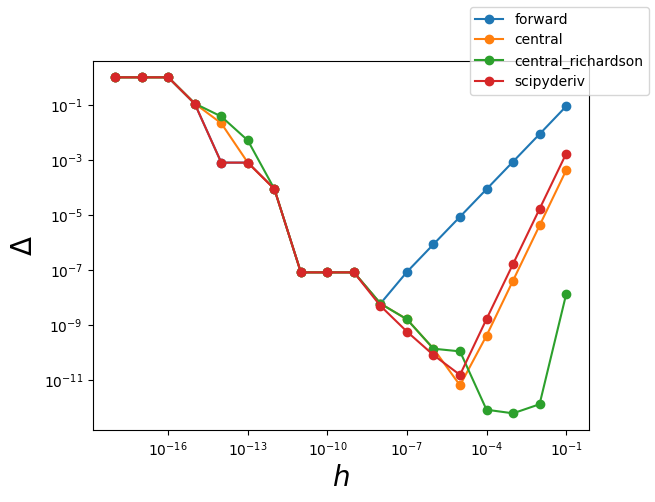

In [6]:
# %%writefile plot_derivs.py

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative as spderiv

def forward(f, x, h):
    return (f(x+h)-f(x))/h

def central(f, x, h):
    return (f(x+h/2)-f(x-h/2))/h

def central_richardson(f, x, h):
    # YOUR CODE HERE
    val1 = central(f, x, h)
    val2 = central(f, x, h/2)
    return val2 + (val2-val1)/3

def compare_derivatives():    
    fig, ax = plt.subplots()
    h = np.power(10.0, np.arange(-18, 0, +1))
    x = np.pi/3
    # YOUR CODE HERE
    deriv_exact = np.cos
    fun = np.sin
    algnames=["forward", "central", "central_richardson", "scipyderiv"]
    for alg, algname in zip([forward, central, central_richardson, spderiv], algnames):
        diff = np.abs(1 - alg(fun, x, h)/deriv_exact(x))
        ax.loglog(h, diff, '-o', label=algname)
    ax.set_xlabel(rf"$h$", fontsize=20)
    ax.set_ylabel(rf"$\Delta$", fontsize=20)
    fig.legend()
    plt.show()
    fig.savefig("derivs.pdf")
    

compare_derivatives()



## Error from Taylor series
Determine the error term in the formula
$$f'(x) \simeq \frac{1}{4h} [f(x+3h) - f(x-h)]$$

YOUR ANSWER HERE

## Lanczos Method
Extend the derivatives comparison exercise by adding the following estimation
$$f'(x) \simeq \frac{3}{2h^3} \int_{-h}^h tf(x+t) dt .$$
How is the order of the approximation?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Tracker data
Record a video of a particle undergoing parabolic motion. Compute the trajectory using tracker. Export and process the positions using the central difference algorithm to estimate the velocity. How does your estimation compares with the one done by tracker? what method does tracker use? 

YOUR ANSWER HERE